In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(0)
n_feature = 2

In [2]:
# make samlpes
r1 = 0.7
D1 = 3.0
mean1 = [3, 7]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i  in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [4, 2]
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

N1, N2 = 1000, 1200
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123, test_size=0.3, shuffle=True)

In [3]:
w = np.ones(len(x_train)) / len(x_train)

T = 10 # num of models

b_ = [] # list of algoritms
alpha = []

for t in range(T-1):


    b_.append(DecisionTreeClassifier(criterion='gini', max_depth=3))
    b_[t].fit(x_train, y_train, sample_weight=w)

    predict = b_[t].predict(x_train)
    N = np.sum(w * (predict != y_train))
    alpha.append(0.5 * np.log((1 - N) / N) if N != 0 else np.log((1 - 1e-8) / 1e-8))

    w = w * np.exp(-1 * alpha[t] * y_train * predict)
    w = w / np.sum(w)

a = []

for i in range(T-1):
    a.append(alpha[i] * b_[i].predict(x_test))

a = np.sign(np.sum(a, axis=0))

Q = np.sum(a != y_test)
Q


np.int64(9)

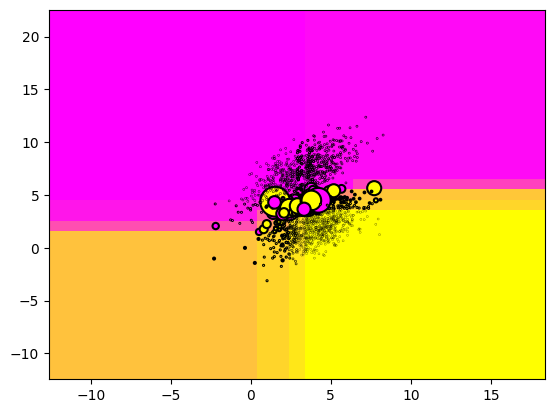

In [4]:
import matplotlib.pyplot as plt
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 10, data[:, 0].max() + 10
    y_min, y_max = data[:, 1].min() - 10, data[:, 1].max() + 10
    return np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

xx, yy = get_grid(x_test)
predicted = alpha[0] * b_[0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
for n in range(1, T-1):
    predicted += alpha[n] * b_[n].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='spring', shading='auto')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=5000 * w, cmap='spring', edgecolors='black', linewidth=1.5)
plt.show()